In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rc('font', family='serif')

Supongan que lo que quieren predecir se comporta como una función seno

In [3]:
x_ = np.linspace(0, 1, 1000).reshape(-1,1)
y_real =  np.sin(2*np.pi*x_)

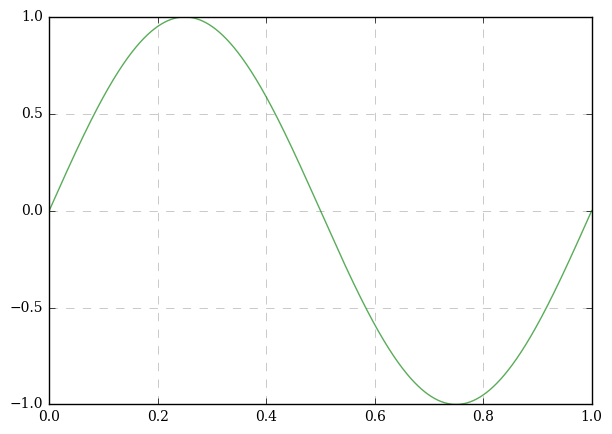

In [4]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(min(x_), max(x_))
ax.plot(x_, y_real, color='g', alpha=0.65)

In [5]:
x = np.random.choice(x_[:,0], size=10, replace=False).reshape(-1,1)
y = np.sin(2*np.pi*x) + np.random.normal(loc=0.0, scale=0.25, size=(x.shape[0],1))

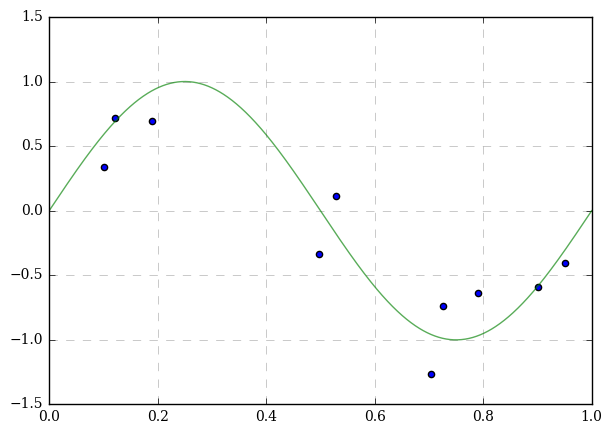

In [6]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(min(x_), max(x_))

ax.plot(x_, y_real, color='g', alpha=0.65)
ax.scatter(x, y)

Qué tan diferentes son los datos de la función real?

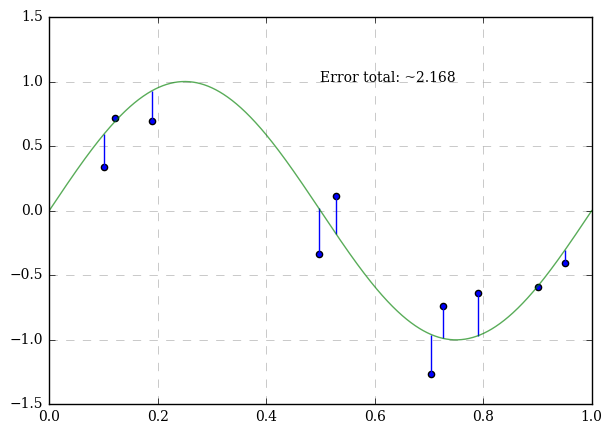

In [7]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(min(x_), max(x_))

ax.plot(x_, y_real, color='g', alpha=0.65)
ax.scatter(x, y)
error = 0
for x_i, y_i in zip(x, y):
    y_r = np.sin(2*np.pi*x_i)
    error_i = y_i - y_r
    if error < 0:
        ax.vlines(x_i, y_r, y_i, colors='b')
    else:
        ax.vlines(x_i, y_i, y_r, colors='b')
    error += np.abs(error_i)
ax.text(0.5, 1.0, 'Error total: ~{:{}.{}}'.format(error[0], 5, 4))

## Regresión Lineal
supongamos que para estos datos queremos ajustar $y = f(x)$ donde $f$ es una función lineal

In [8]:
regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)

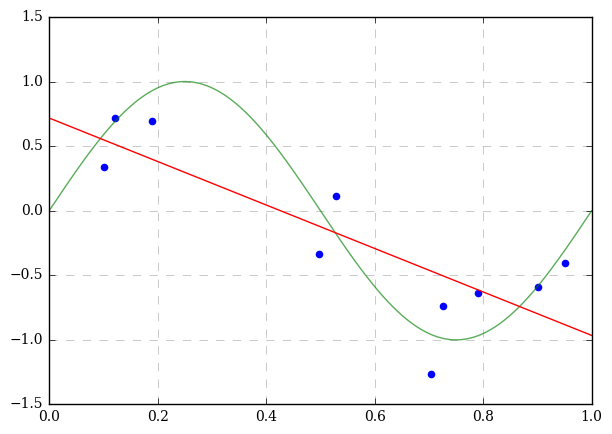

In [9]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(min(x_), max(x_))

ax.plot(x_, y_real, color='g', alpha=0.65)
ax.scatter(x, y, color = 'b')
ax.plot(x_, regressor.predict(x_), color = 'r')

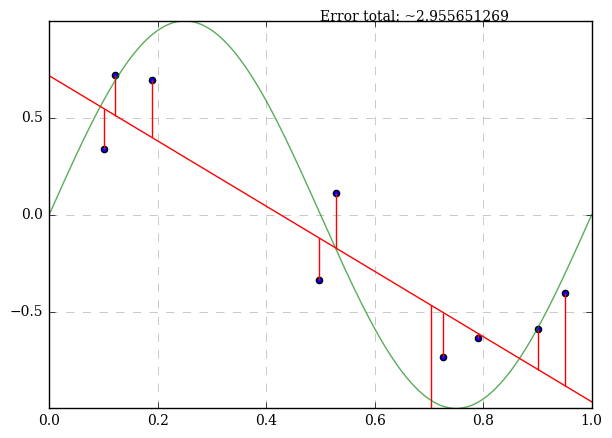

In [10]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(min(x_), max(x_))
ax.set_ylim(min(y_real), max(y_real))

ax.plot(x_, y_real, color='g', alpha=0.65)
ax.scatter(x, y)
ax.plot(x_, regressor.predict(x_), color = 'r')
error = 0
for x_i, y_i, y_ip, in zip(x, y, y_pred):
    error_i = y_i - y_ip
    if error < 0:
        ax.vlines(x_i, y_ip, y_i, colors='r')
    else:
        ax.vlines(x_i, y_i, y_ip, colors='r')
    error += np.abs(error_i)
ax.text(0.5, 1.0, 'Error total: ~{:{}.{}}'.format(error[0], 5, 10))

## Regresión lineal de grado  2

Ahora suponemos queremos ajustar $y=f(x)$ suponiendo que $f$ es de la forma $ax^{2}+bx + c$

In [11]:
X = np.concatenate((x, x**2), axis=1)
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

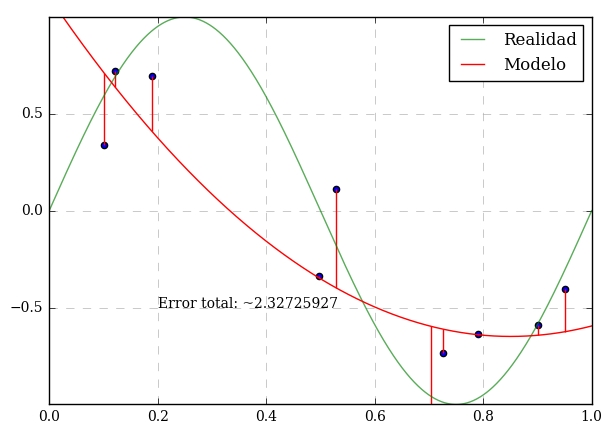

In [13]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(min(x_), max(x_))
ax.set_ylim(min(y_real), max(y_real))

ax.plot(x_, y_real, color='g', alpha=0.65, label='Realidad')
ax.scatter(x, y)
ax.plot(x_, regressor.predict(np.concatenate((x_, x_**2), axis=1)), color = 'r', label='Modelo')
error = 0
for x_i, y_i, y_ip, in zip(x, y, y_pred):
    error_i = y_i - y_ip
    if error < 0:
        ax.vlines(x_i, y_ip, y_i, colors='r')
    else:
        ax.vlines(x_i, y_i, y_ip, colors='r')
    error += np.abs(error_i)
ax.text(0.2, -0.5, 'Error total: ~{:{}.{}}'.format(error[0], 5, 10))
ax.legend(loc='best')

## Regresión lineal de grado 3

Ahora suponemos queremos ajustar $y=f(x)$ suponiendo que $f$ es de la forma $ax^{3} + bx^{2}+cx + d$

In [14]:
X = np.concatenate((x, x**2, x**3), axis=1)
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

In [15]:
pd.DataFrame(X)

,0,1,2
0,0.496496,0.246509,0.122391
1,0.789790,0.623768,0.492646
2,0.901902,0.813427,0.733631
3,0.726727,0.528132,0.383807
4,0.189189,0.035793,0.006772
5,0.122122,0.014914,0.001821
6,0.950951,0.904308,0.859952
7,0.528529,0.279342,0.147640
8,0.101101,0.010221,0.001033
9,0.704705,0.496609,0.349963


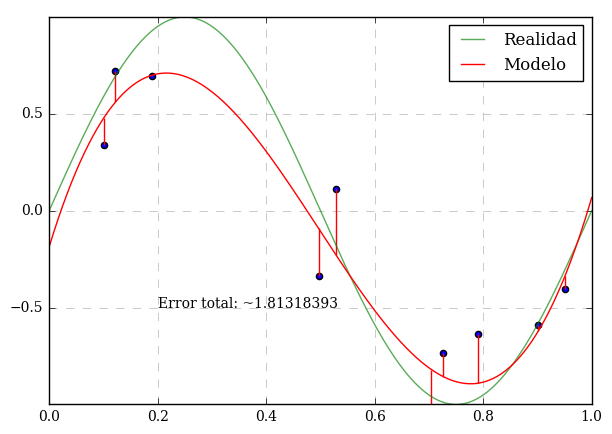

In [17]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(min(x_), max(x_))
ax.set_ylim(min(y_real), max(y_real))

ax.plot(x_, y_real, color='g', alpha=0.65, label='Realidad')
ax.scatter(x, y)
ax.plot(x_, regressor.predict(np.concatenate((x_, x_**2, x_**3), axis=1)), color = 'r', label='Modelo')
error = 0
for x_i, y_i, y_ip, in zip(x, y, y_pred):
    error_i = y_i - y_ip
    if error < 0:
        ax.vlines(x_i, y_ip, y_i, colors='r')
    else:
        ax.vlines(x_i, y_i, y_ip, colors='r')
    error += np.abs(error_i)
ax.text(0.2, -0.5, 'Error total: ~{:{}.{}}'.format(error[0], 5, 10))
ax.legend(loc='best')

## Regersión lineal de grado 4

In [18]:
poly = PolynomialFeatures(4, include_bias=False)
X = poly.fit_transform(x)
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

In [19]:
pd.DataFrame(X)

,0,1,2,3
0,0.496496,0.246509,0.122391,0.060767
1,0.789790,0.623768,0.492646,0.389086
2,0.901902,0.813427,0.733631,0.661664
3,0.726727,0.528132,0.383807,0.278923
4,0.189189,0.035793,0.006772,0.001281
5,0.122122,0.014914,0.001821,0.000222
6,0.950951,0.904308,0.859952,0.817772
7,0.528529,0.279342,0.147640,0.078032
8,0.101101,0.010221,0.001033,0.000104
9,0.704705,0.496609,0.349963,0.246620


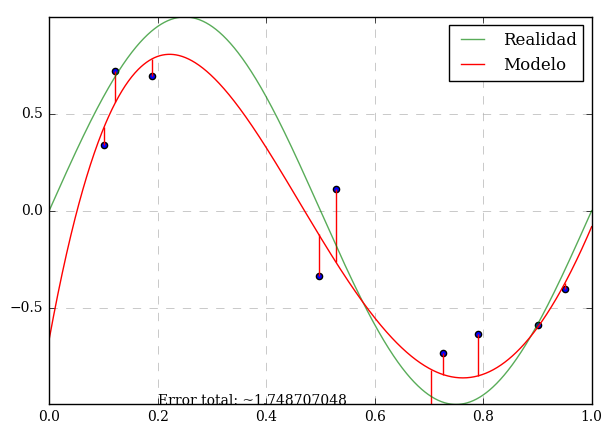

In [20]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(min(x_), max(x_))
ax.set_ylim(min(y_real), max(y_real))

ax.plot(x_, y_real, color='g', alpha=0.65, label='Realidad')
ax.scatter(x, y)
ax.plot(x_, regressor.predict((poly.transform(x_))), color='r', label='Modelo')
error = 0
for x_i, y_i, y_ip, in zip(x, y, y_pred):
    error_i = y_i - y_ip
    if error < 0:
        ax.vlines(x_i, y_ip, y_i, colors='r')
    else:
        ax.vlines(x_i, y_i, y_ip, colors='r')
    error += np.abs(error_i)
ax.text(0.2, -1.0, 'Error total: ~{:{}.{}}'.format(error[0], 5, 10))
ax.legend(loc='best')

## Regersión lineal de grado 5

In [146]:
poly = PolynomialFeatures(5, include_bias=False)
X = poly.fit_transform(x)
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

In [147]:
pd.DataFrame(X)

,0,1,2,3,4
0,0.333333,0.111111,0.037037,1.234568e-02,4.115226e-03
1,0.263263,0.069308,0.018246,4.803536e-03,1.264595e-03
2,0.861862,0.742806,0.640196,5.517606e-01,4.755414e-01
3,0.749750,0.562125,0.421453,3.159842e-01,2.369090e-01
4,0.020020,0.000401,0.000008,1.606416e-07,3.216048e-09
5,0.246246,0.060637,0.014932,3.676872e-03,9.054159e-04
6,0.351351,0.123448,0.043374,1.523935e-02,5.354367e-03
7,0.340340,0.115832,0.039422,1.341695e-02,4.566328e-03
8,0.932933,0.870364,0.811991,7.575332e-01,7.067277e-01
9,0.602603,0.363130,0.218823,1.318633e-01,7.946118e-02


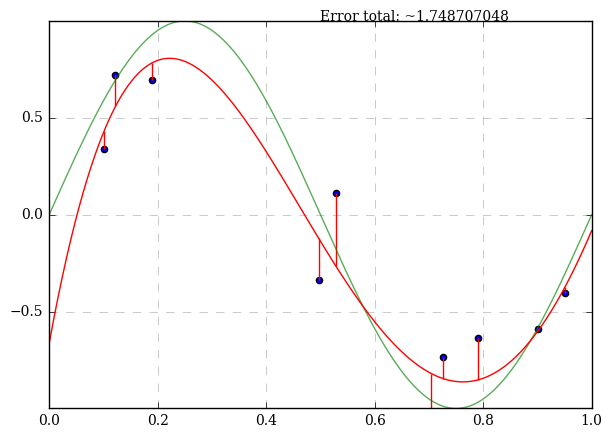

In [21]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(min(x_), max(x_))
ax.set_ylim(min(y_real), max(y_real))

ax.plot(x_, y_real, color='g', alpha=0.65)
ax.scatter(x, y)
ax.plot(x_, regressor.predict((poly.transform(x_))), color = 'r')
error = 0
for x_i, y_i, y_ip, in zip(x, y, y_pred):
    error_i = y_i - y_ip
    if error < 0:
        ax.vlines(x_i, y_ip, y_i, colors='r')
    else:
        ax.vlines(x_i, y_i, y_ip, colors='r')
    error += np.abs(error_i)
ax.text(0.5, 1.0, 'Error total: ~{:{}.{}}'.format(error[0], 5, 10))

## Regersión lineal de grado 6

In [149]:
poly = PolynomialFeatures(6, include_bias=False)
X = poly.fit_transform(x)
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

In [150]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,0.333333,0.111111,0.037037,1.234568e-02,4.115226e-03,1.371742e-03
1,0.263263,0.069308,0.018246,4.803536e-03,1.264595e-03,3.329213e-04
2,0.861862,0.742806,0.640196,5.517606e-01,4.755414e-01,4.098510e-01
3,0.749750,0.562125,0.421453,3.159842e-01,2.369090e-01,1.776225e-01
4,0.020020,0.000401,0.000008,1.606416e-07,3.216048e-09,6.438535e-11
5,0.246246,0.060637,0.014932,3.676872e-03,9.054159e-04,2.229553e-04
6,0.351351,0.123448,0.043374,1.523935e-02,5.354367e-03,1.881264e-03
7,0.340340,0.115832,0.039422,1.341695e-02,4.566328e-03,1.554106e-03
8,0.932933,0.870364,0.811991,7.575332e-01,7.067277e-01,6.593296e-01
9,0.602603,0.363130,0.218823,1.318633e-01,7.946118e-02,4.788351e-02


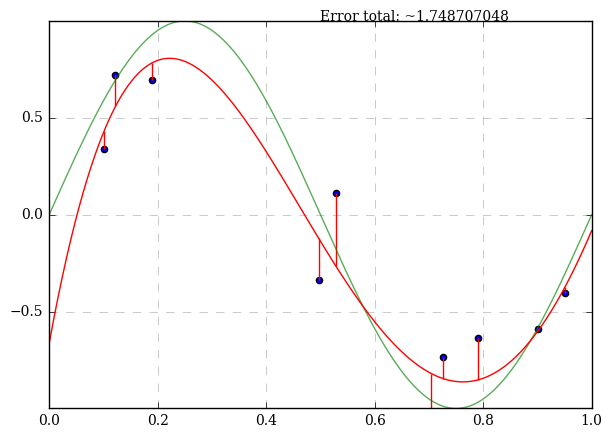

In [22]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(min(x_), max(x_))
ax.set_ylim(min(y_real), max(y_real))

ax.plot(x_, y_real, color='g', alpha=0.65)
ax.scatter(x, y)
ax.plot(x_, regressor.predict((poly.transform(x_))), color = 'r')
error = 0
for x_i, y_i, y_ip, in zip(x, y, y_pred):
    error_i = y_i - y_ip
    if error < 0:
        ax.vlines(x_i, y_ip, y_i, colors='r')
    else:
        ax.vlines(x_i, y_i, y_ip, colors='r')
    error += np.abs(error_i)
ax.text(0.5, 1.0, 'Error total: ~{:{}.{}}'.format(error[0], 5, 10))

## y mucho más.....

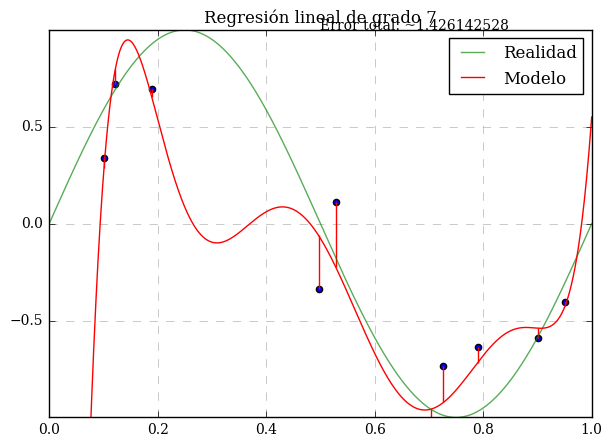

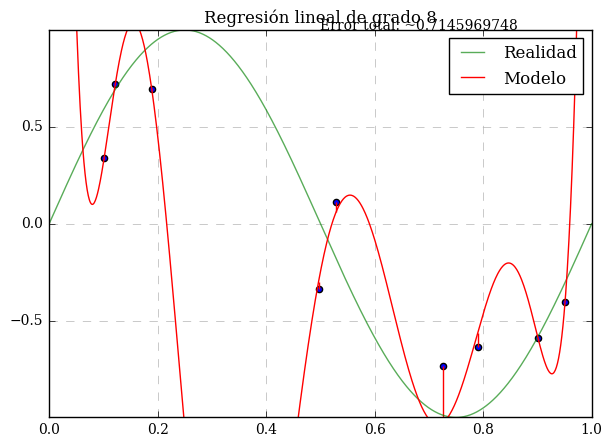

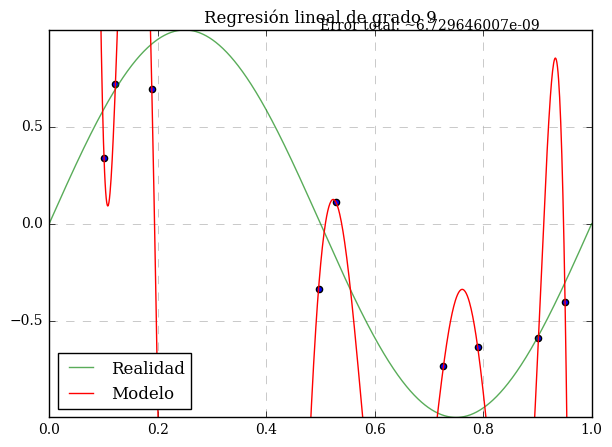

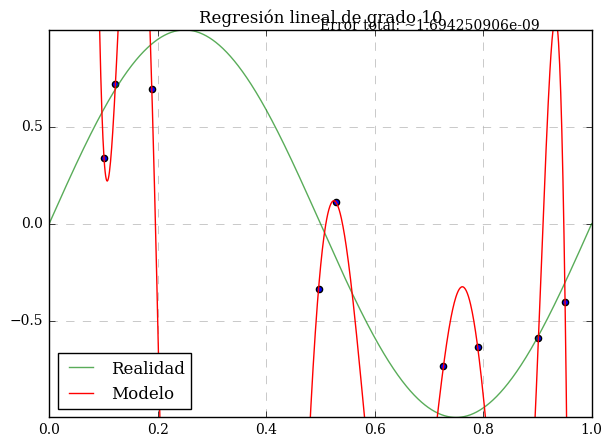

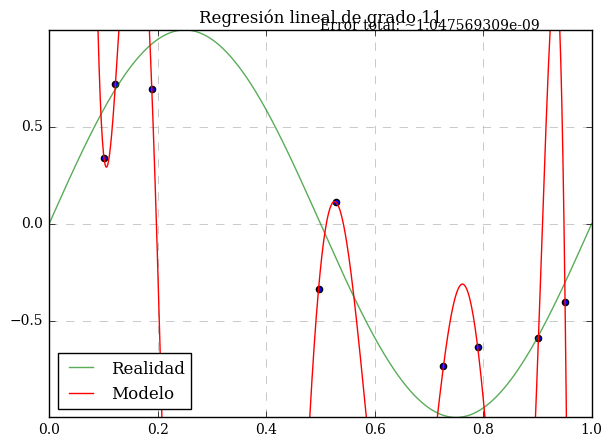

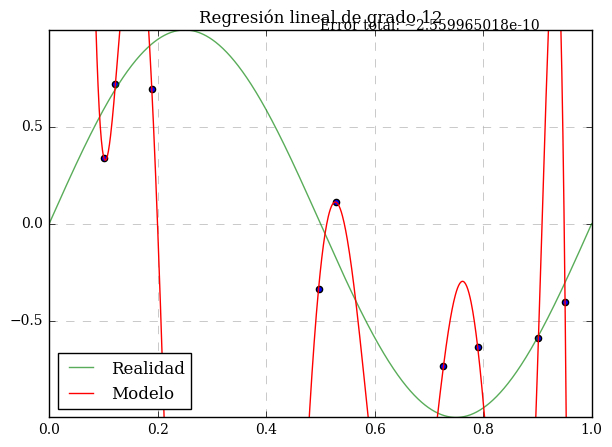

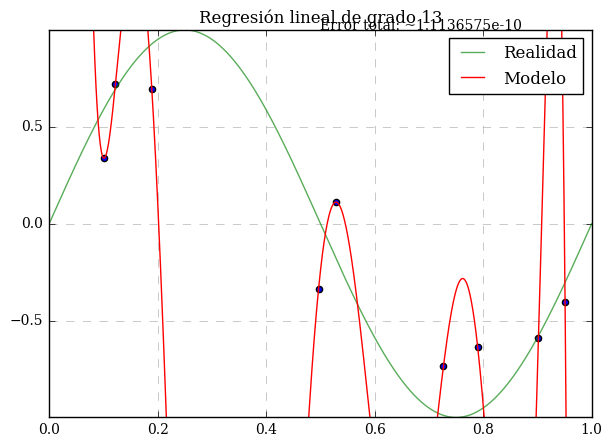

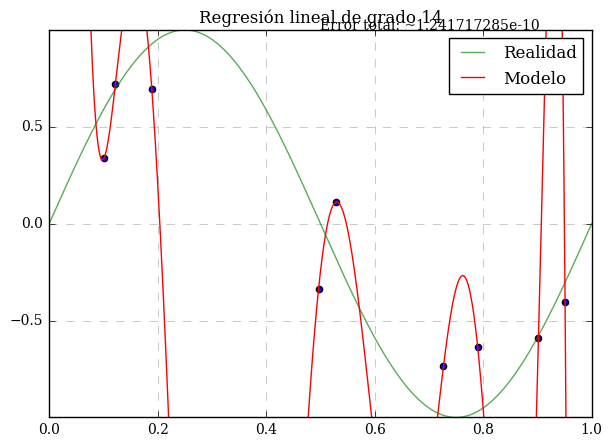

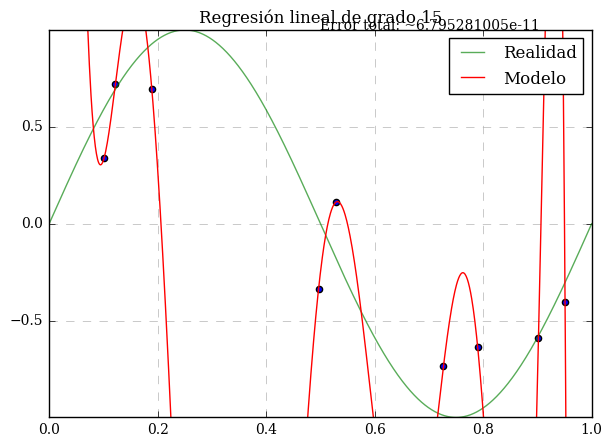

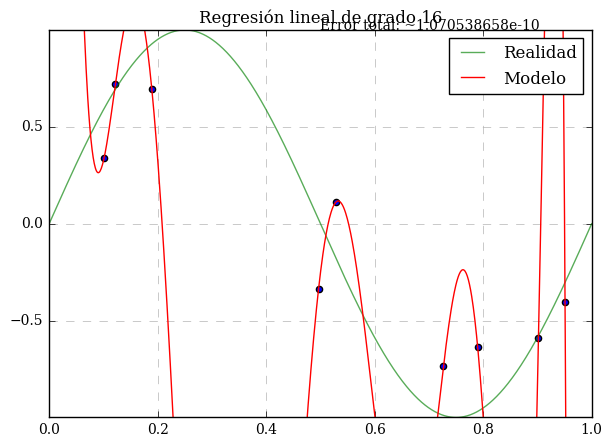

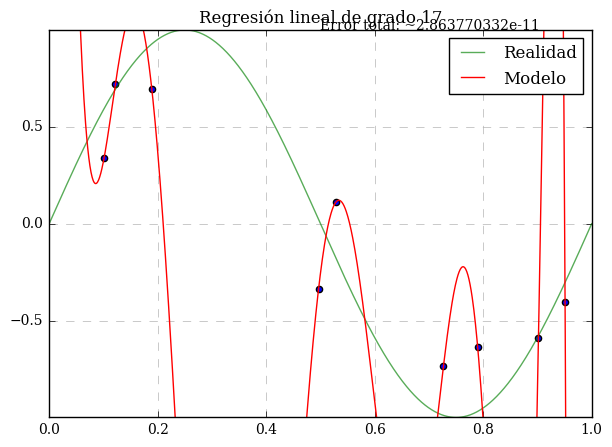

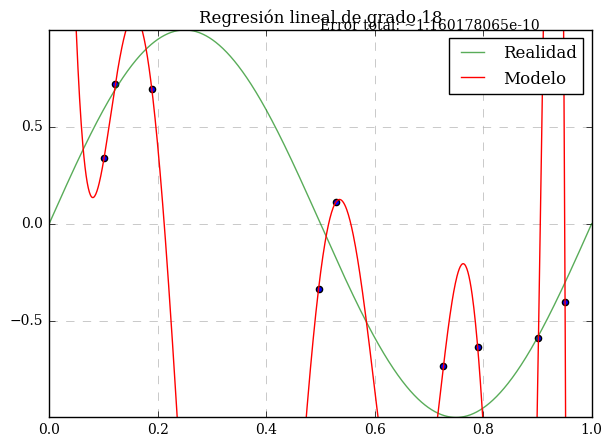

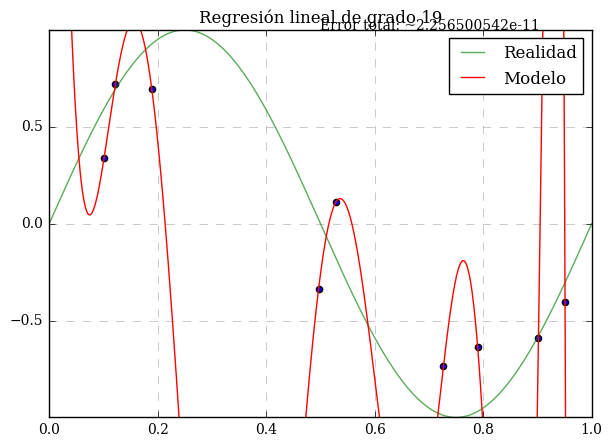

In [23]:
for i in range(7,20):
    poly = PolynomialFeatures(i, include_bias=False)
    X = poly.fit_transform(x)
    regressor = LinearRegression()
    regressor.fit(X, y)
    y_pred = regressor.predict(X)

    fig = plt.figure(figsize=[7, 5])
    ax = fig.add_subplot(111)
    ax.set_axisbelow(True)
    ax.grid(linestyle='--',color='0.7')
    ax.set_xlim(min(x_), max(x_))
    ax.set_ylim(min(y_real), max(y_real))

    ax.plot(x_, y_real, color='g', alpha=0.65, label='Realidad')
    ax.scatter(x, y)
    ax.plot(x_, regressor.predict((poly.transform(x_))), color='r', label='Modelo')
    error = 0
    for x_i, y_i, y_ip, in zip(x, y, y_pred):
        error_i = y_i - y_ip
        if error < 0:
            ax.vlines(x_i, y_ip, y_i, colors='r')
        else:
            ax.vlines(x_i, y_i, y_ip, colors='r')
        error += np.abs(error_i)
    ax.text(0.5, 1.0, 'Error total: ~{:{}.{}}'.format(error[0], 5, 10))
    ax.set_title('Regresión lineal de grado '+str(i))
    ax.legend(loc='best')

## Cómo saber cuál es mejor?
Se deben separar más datos, unos para evaluar y otros para entrenar el modelo. Diez datos no serían suficientes

In [24]:
x = np.random.choice(x_[:,0], size=100).reshape(-1,1)
y = np.sin(2*np.pi*x) + np.random.normal(loc=0.0, scale=0.25, size=(x.shape[0],1))

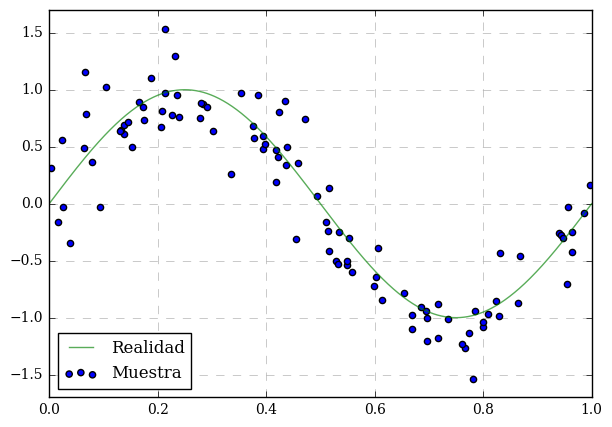

In [28]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(min(x_), max(x_))
ax.set_ylim(-1.7, 1.7)

ax.plot(x_, y_real, color='g', alpha=0.65, label='Realidad')
ax.scatter(x, y, label='Muestra')
ax.legend(loc='lower left')

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

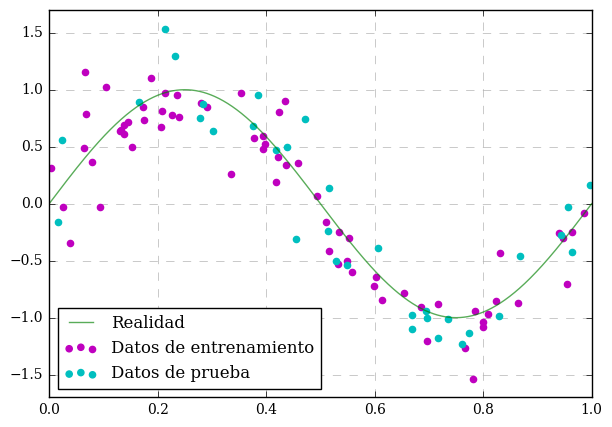

In [29]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(min(x_), max(x_))
ax.set_ylim(-1.7, 1.7)

ax.plot(x_, y_real, color='g', alpha=0.65, label='Realidad')
ax.scatter(x_train, y_train, color='m', label='Datos de entrenamiento')
ax.scatter(x_test, y_test, color='c', label='Datos de prueba')
ax.legend(loc='lower left')

## TAREA OPCIONAL:
Entrenar con polinomios hasta orden 20. Calcular la cantidad de errores cometidos en los datos de prueba y los datos de entrenamiento.